Projekt MNwS - Aleksander Folfas 411052

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 24

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w ANOVA i teście Kruskala-Wallisa w przypadku gdy podgrupy mają różną liczebność.
Rozważyć przypadek trzech grup.
Uzyskane wyniki należy opisać w zależności od:
- liczebności generowanych grup i różnic pomiędzy liczebnościami poszczególnych grup.

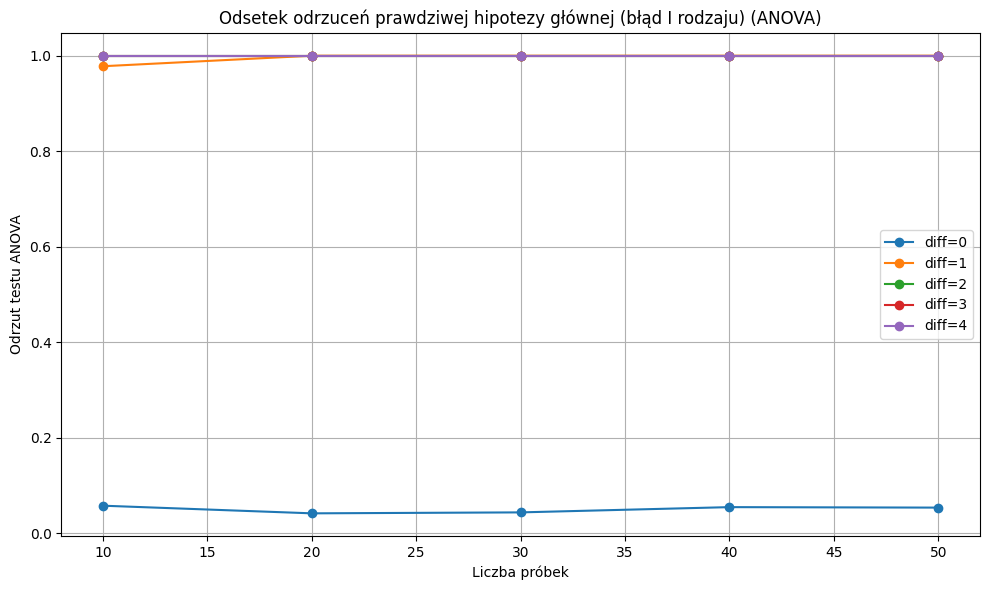

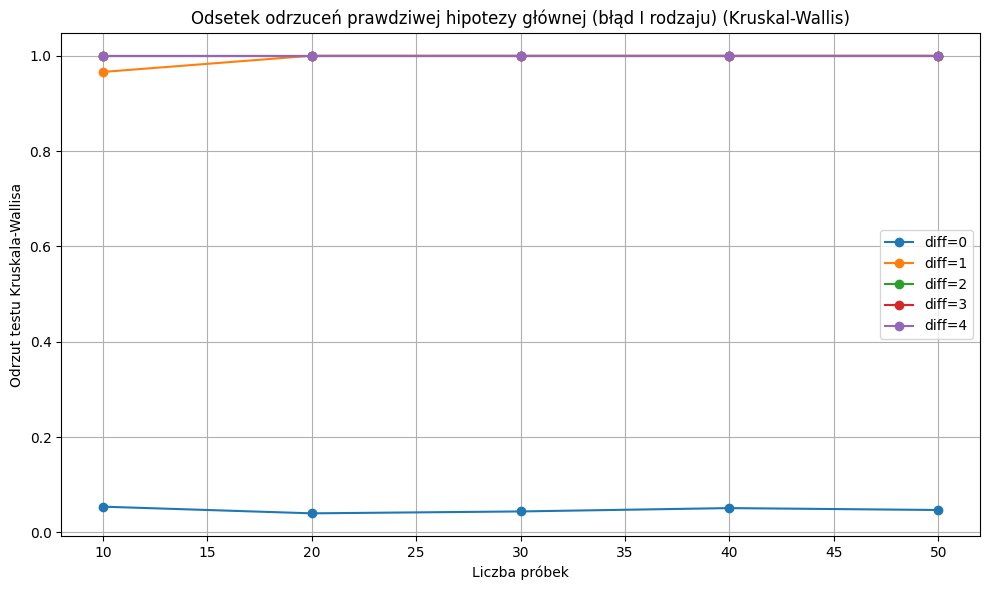

In [8]:
def rejection_rate_anova(group_sizes, group_diffs, n_simulations=1000):
    anova_rejections = 0
    kruskal_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych dla trzech grup o różnych liczebnościach
        samples = []
        for i, size in enumerate(group_sizes):
            samples.append(np.random.normal(0, 1, size=size) + group_diffs[i])

        # Test ANOVA
        _, anova_pvalue = stats.f_oneway(*samples)
        if anova_pvalue < 0.05:
            anova_rejections += 1

        # Test Kruskala-Wallisa
        _, kruskal_pvalue = stats.kruskal(*samples)
        if kruskal_pvalue < 0.05:
            kruskal_rejections += 1

    anova_rejection_rate = anova_rejections / n_simulations
    kruskal_rejection_rate = kruskal_rejections / n_simulations

    return anova_rejection_rate, kruskal_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
group_diffs_range = [0, 1, 2, 3, 4]

anova_rejection_rates = np.zeros((len(n_samples_range), len(group_diffs_range)))
kruskal_rejection_rates = np.zeros((len(n_samples_range), len(group_diffs_range)))

# Symulacje dla różnych wartości liczebności grup i różnic pomiędzy liczebnościami
for i, n_samples in enumerate(n_samples_range):
    for j, group_diff in enumerate(group_diffs_range):
        group_sizes = [n_samples, n_samples + group_diff, n_samples - group_diff]
        anova_rejection_rate, kruskal_rejection_rate = rejection_rate_anova(group_sizes, group_diffs=[0, group_diff, -group_diff])
        anova_rejection_rates[i, j] = anova_rejection_rate
        kruskal_rejection_rates[i, j] = kruskal_rejection_rate

# Wykresy dla testu ANOVA
plt.figure(figsize=(10, 6))
for j, group_diff in enumerate(group_diffs_range):
    plt.plot(n_samples_range, anova_rejection_rates[:, j], '-o', label=f'diff={group_diff}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu ANOVA')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (błąd I rodzaju) (ANOVA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykresy dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))
for j, group_diff in enumerate(group_diffs_range):
    plt.plot(n_samples_range, kruskal_rejection_rates[:, j], '-o', label=f'diff={group_diff}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Kruskala-Wallisa')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (błąd I rodzaju) (Kruskal-Wallis)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()